In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv
/kaggle/input/credit-card-approval-clean-data/crx.csv


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [4]:
card_approval_df=pd.read_csv("/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv"
)
card_approval_df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
card_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [6]:
#no duplicate rows
card_approval_df.duplicated().sum()

0

In [38]:
#categorical and numerical columns
categorical = ["Gender","Married","BankCustomer","Industry","Ethnicity",
               "PriorDefault","Employed","DriversLicense","Citizen","Approved"]
numerical = ["Age","Debt","YearsEmployed","CreditScore","Income"]


In [12]:
#univariate analysis on numerical variables
card_approval_df[numerical].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

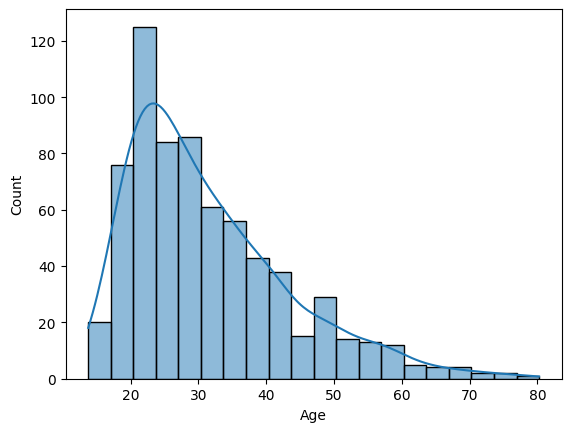

In [13]:
sns.histplot(card_approval_df.Age,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Debt', ylabel='Count'>

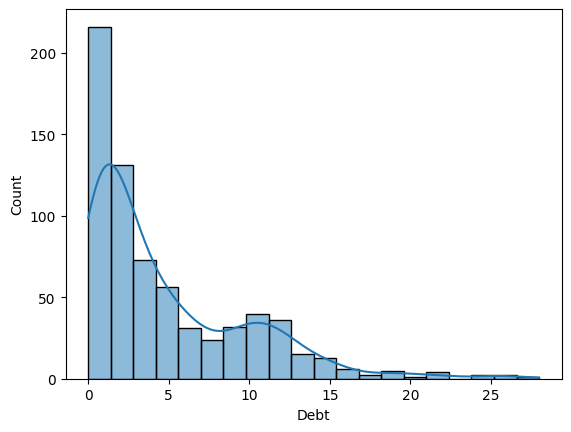

In [15]:
sns.histplot(card_approval_df.Debt,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearsEmployed', ylabel='Count'>

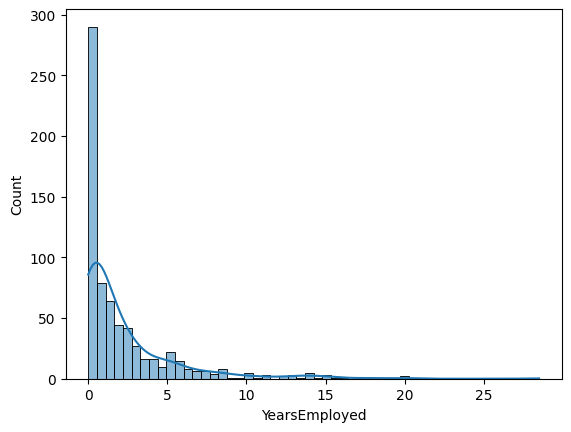

In [14]:
sns.histplot(card_approval_df.YearsEmployed,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CreditScore', ylabel='Count'>

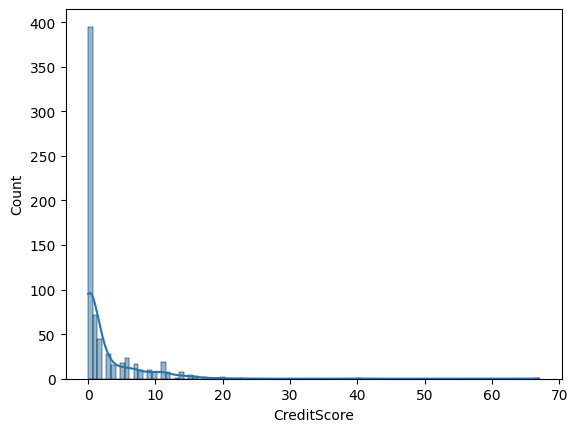

In [16]:
sns.histplot(card_approval_df.CreditScore,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

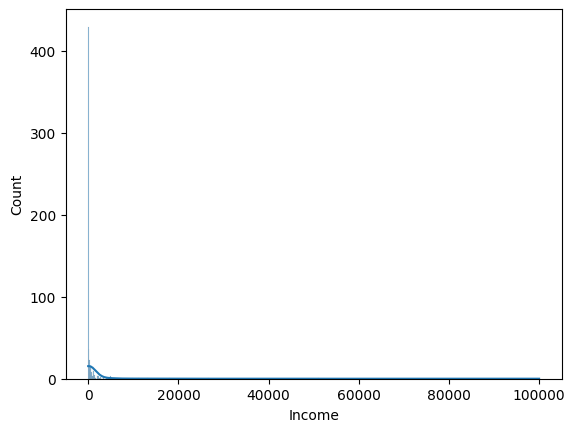

In [17]:
sns.histplot(card_approval_df.Income,kde=True)

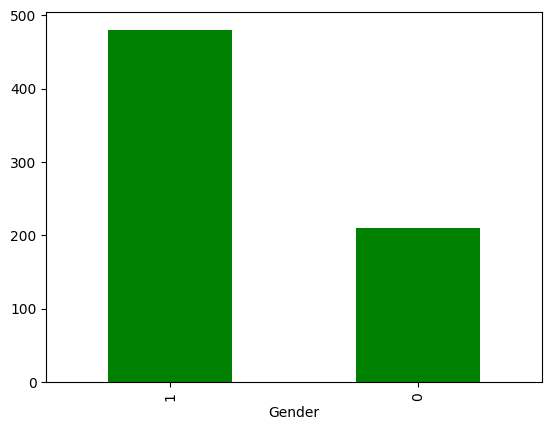

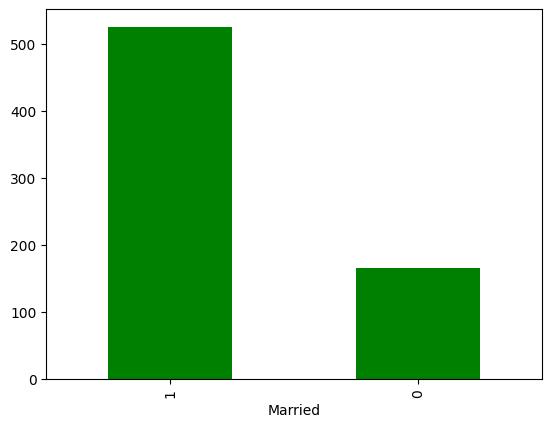

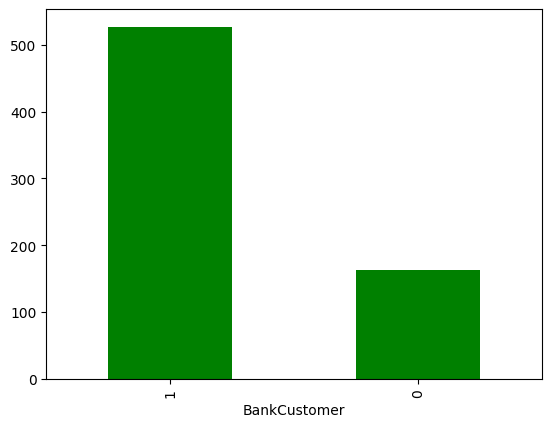

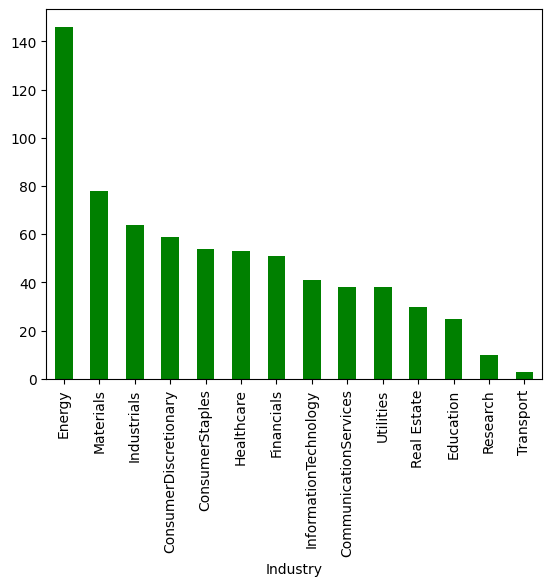

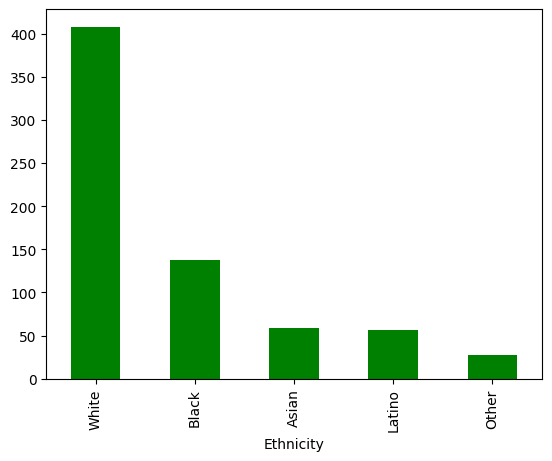

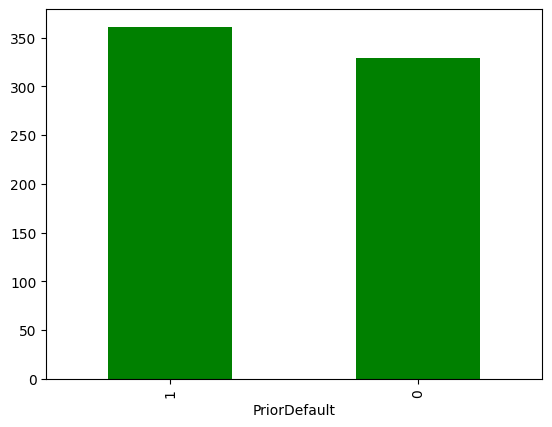

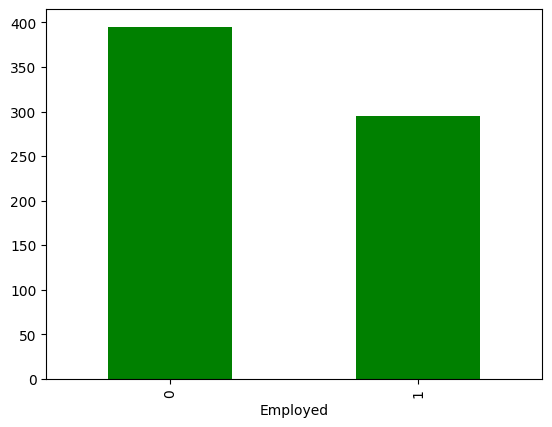

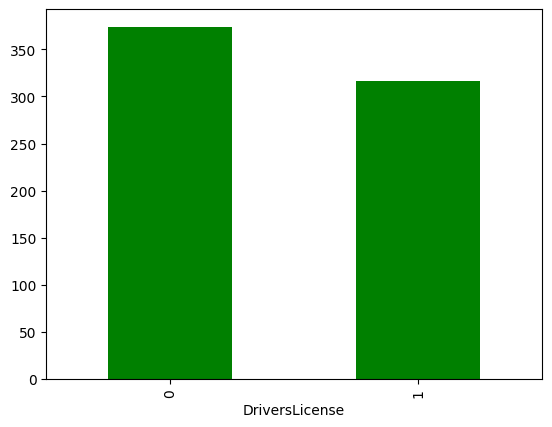

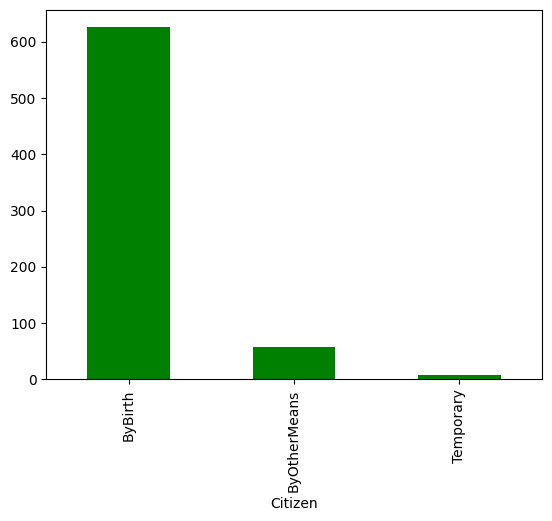

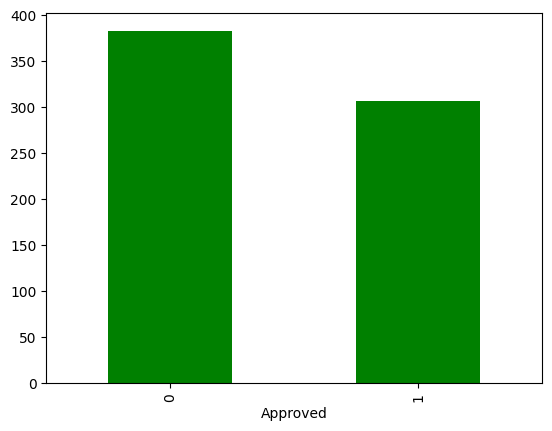

In [40]:
# Univariate Analysis of Categorical Variables

for col in categorical:
    plt.figure()
    card_approval_df[col].value_counts().plot(kind='bar', color='green')
    plt.show()

<Axes: >

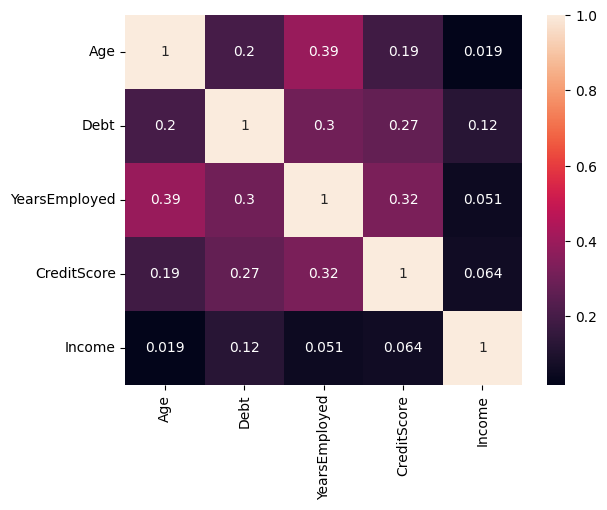

In [43]:
#bivariate analysis numerical variables
sns.heatmap(card_approval_df[numerical].corr(),annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

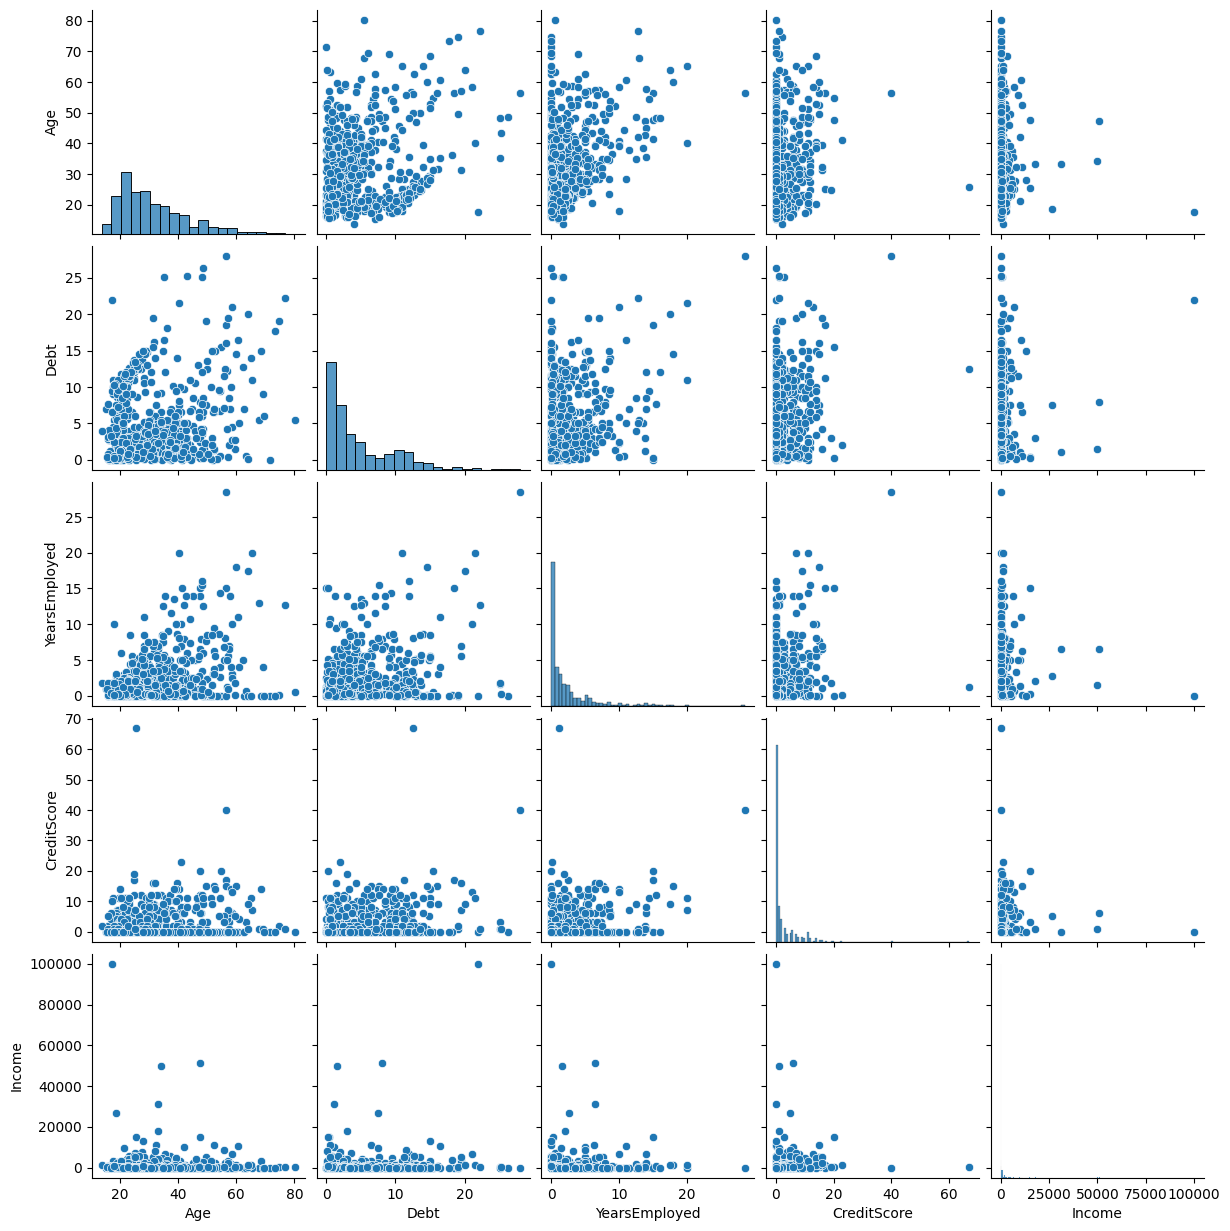

In [45]:
sns.pairplot(card_approval_df[numerical])

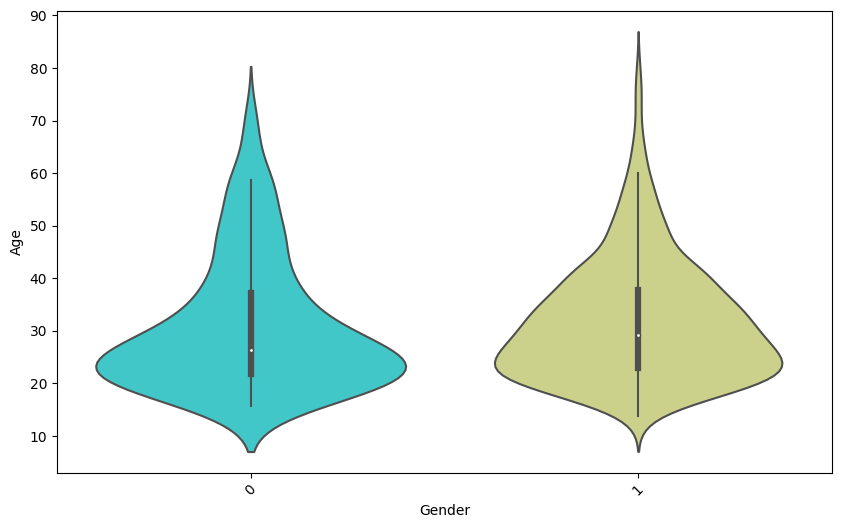

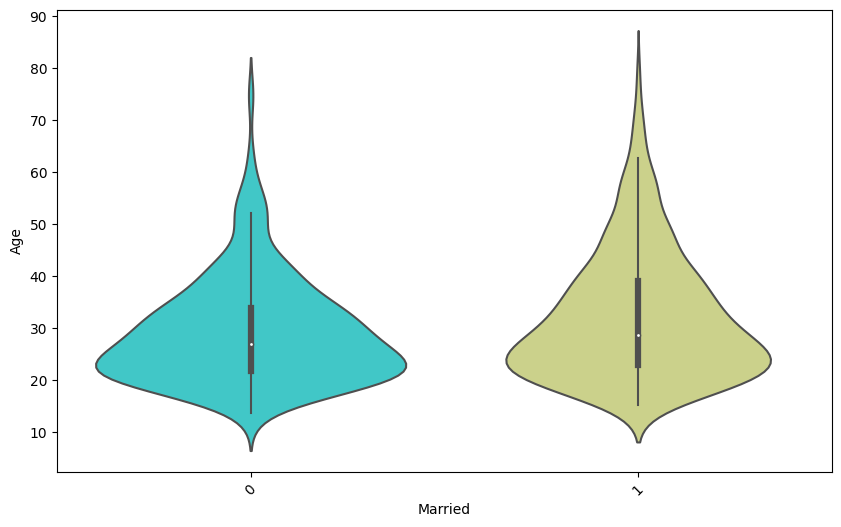

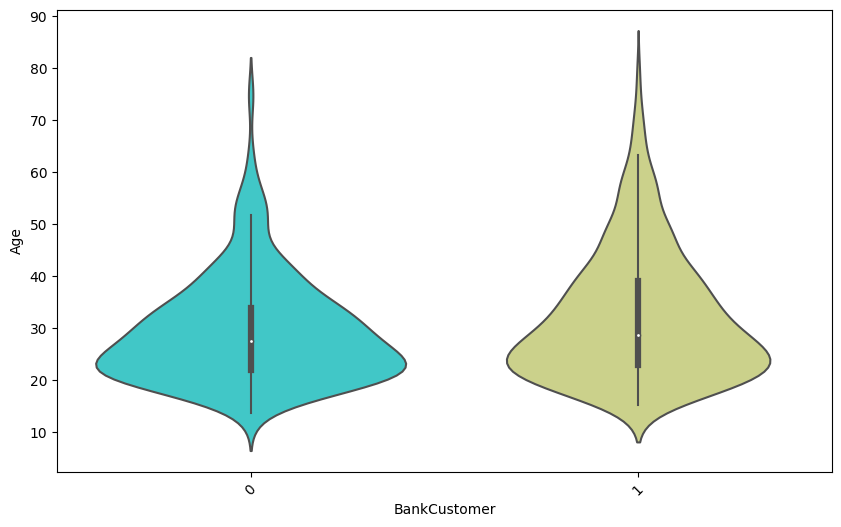

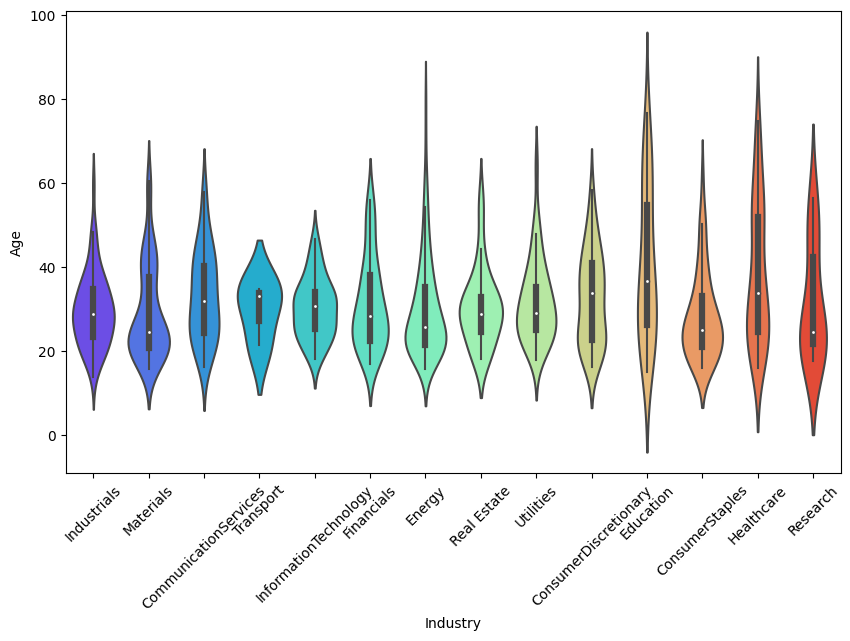

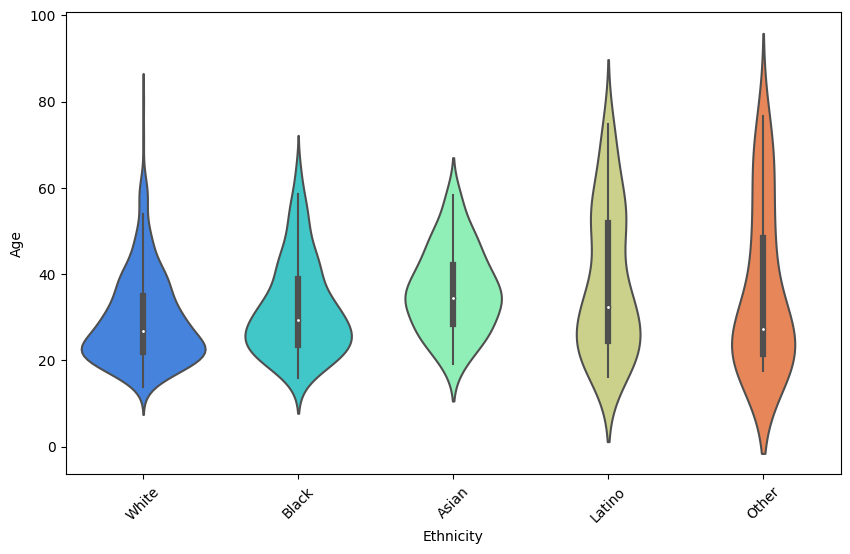

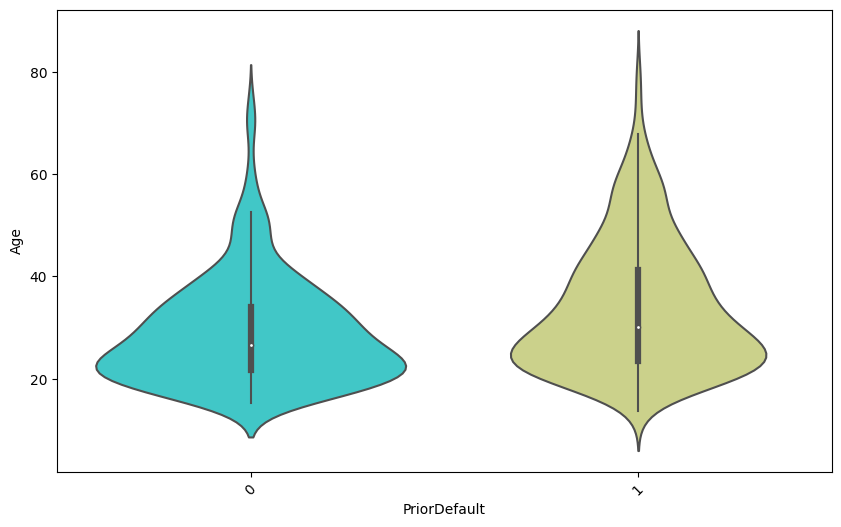

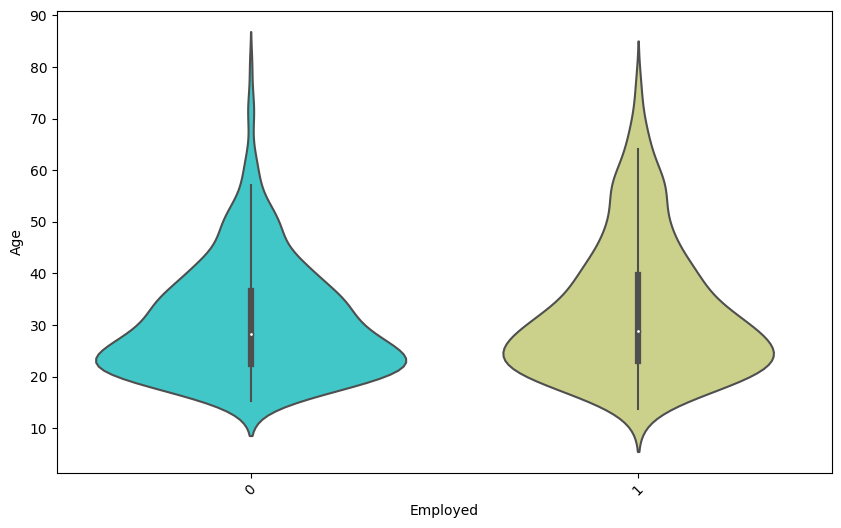

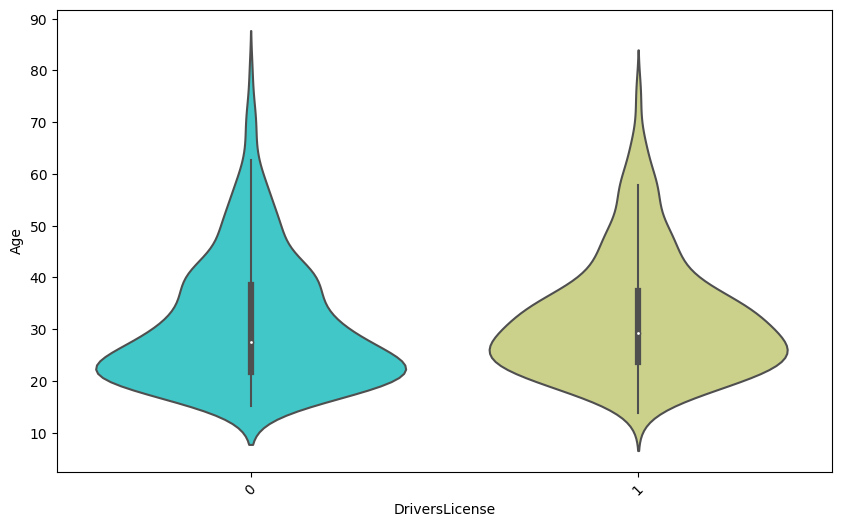

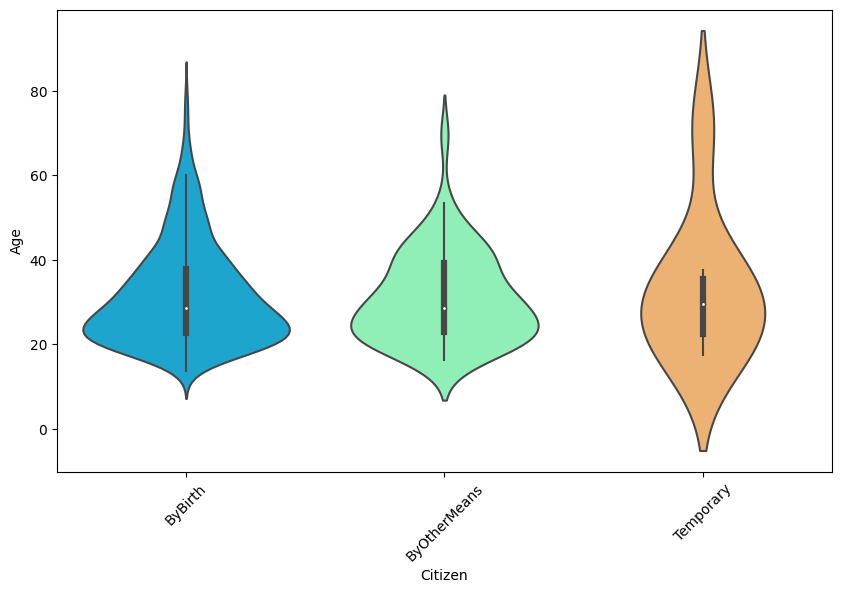

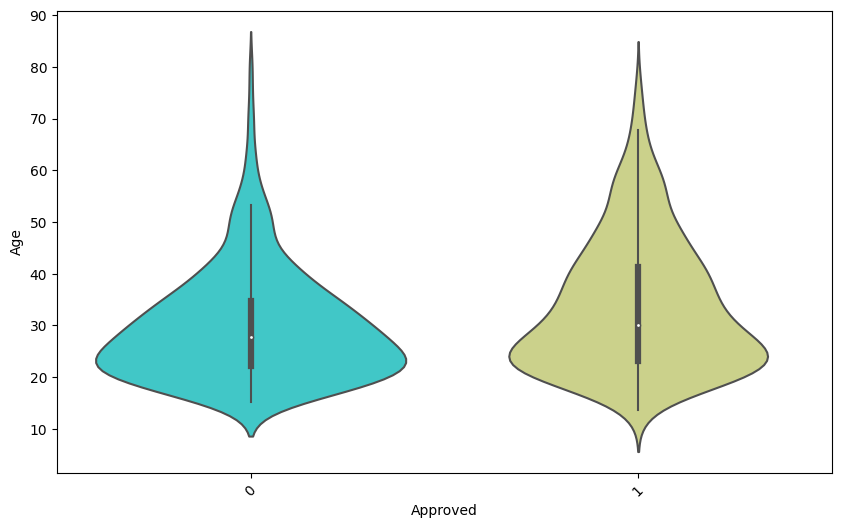

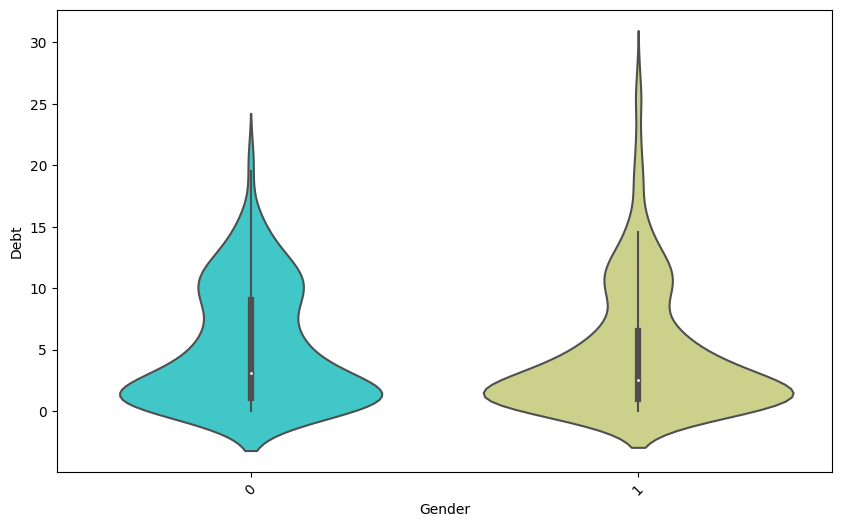

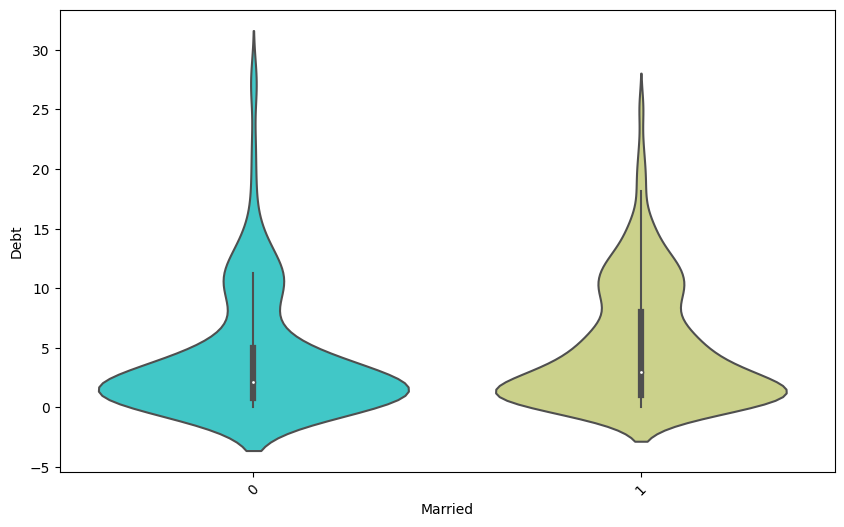

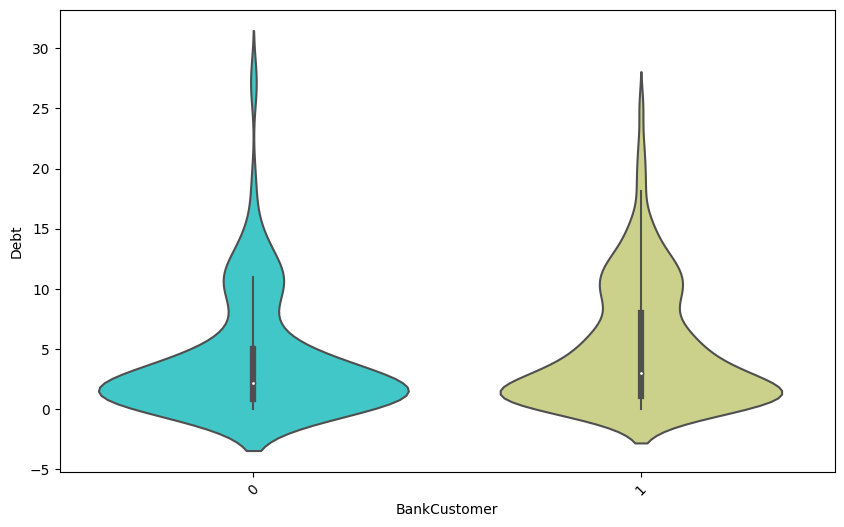

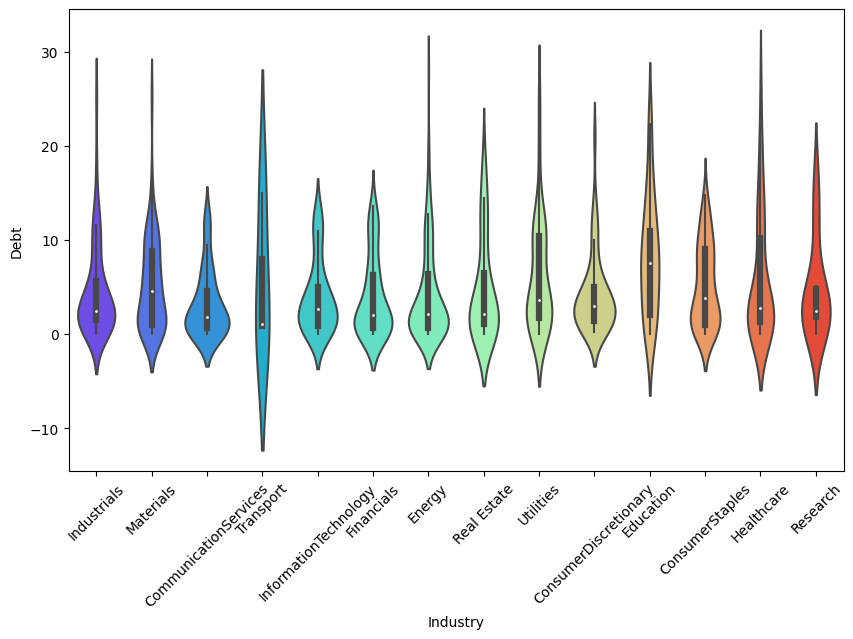

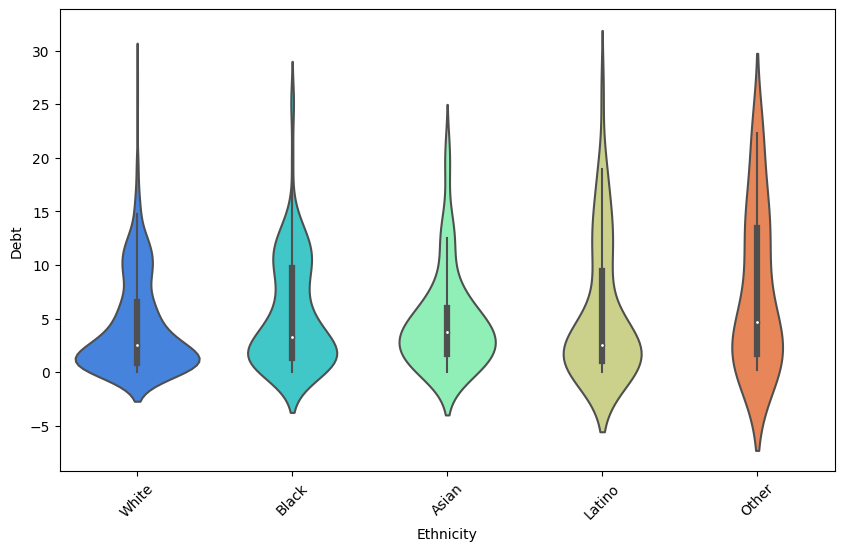

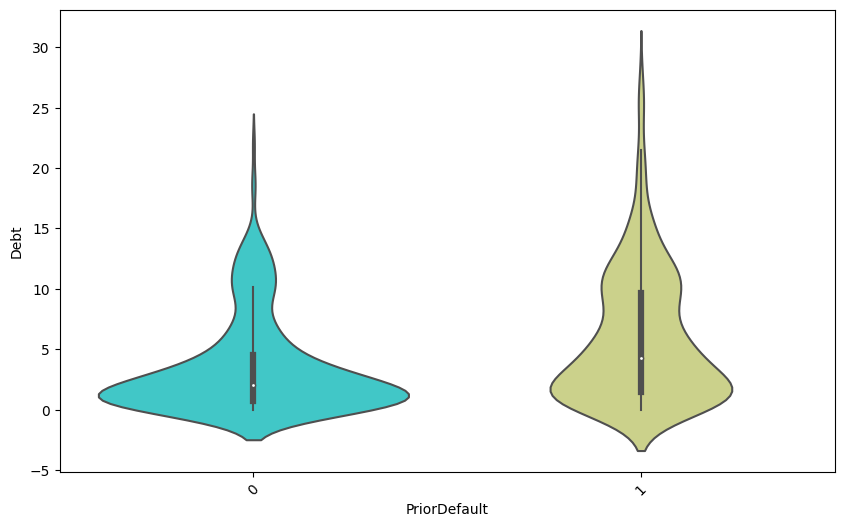

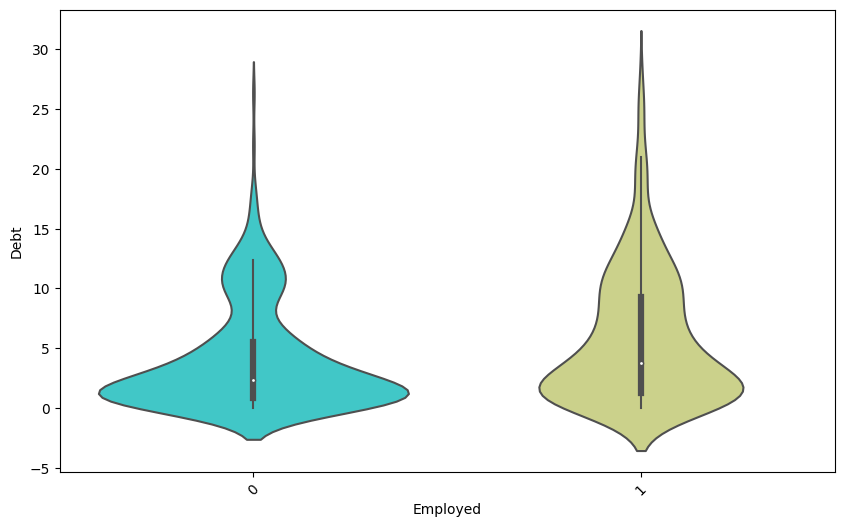

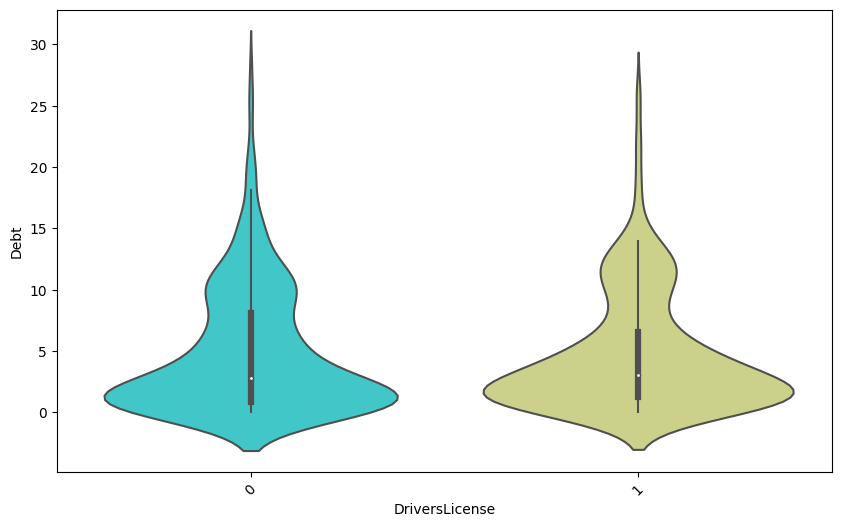

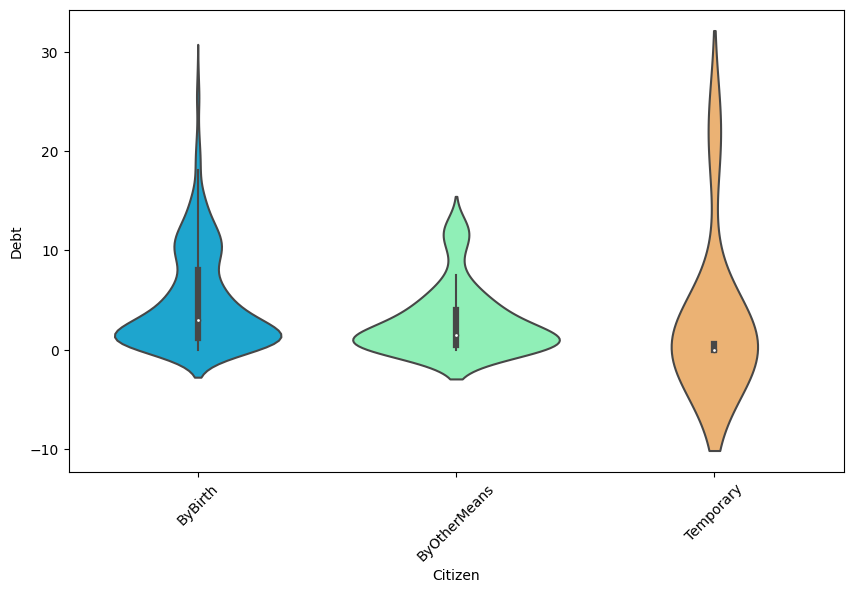

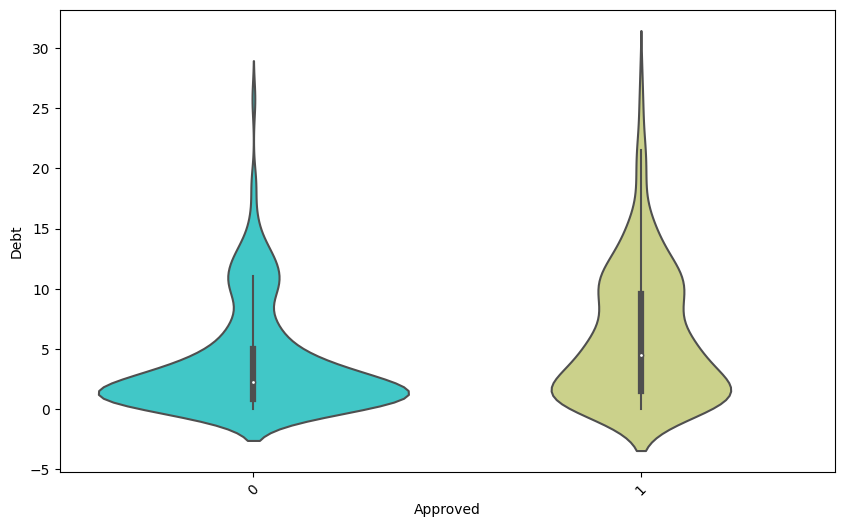

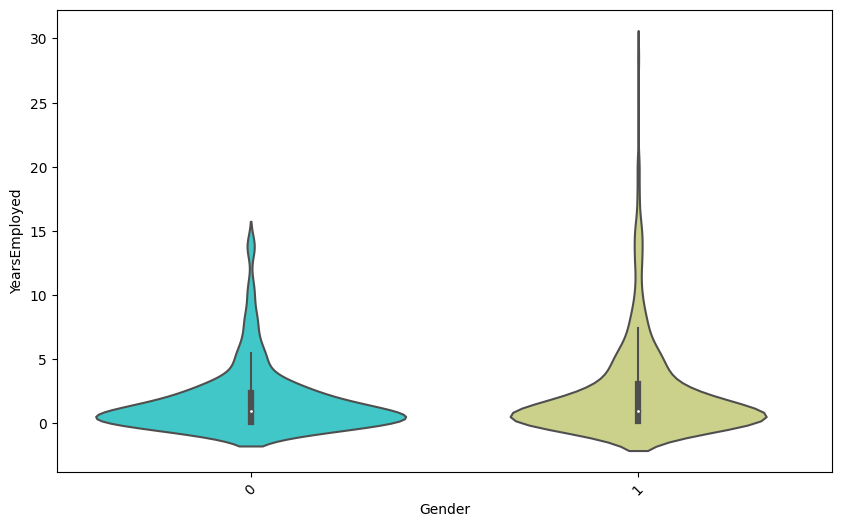

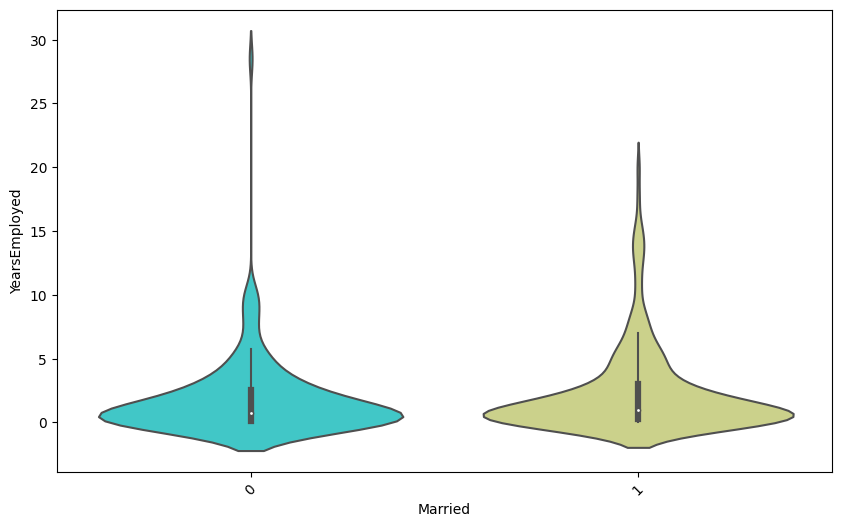

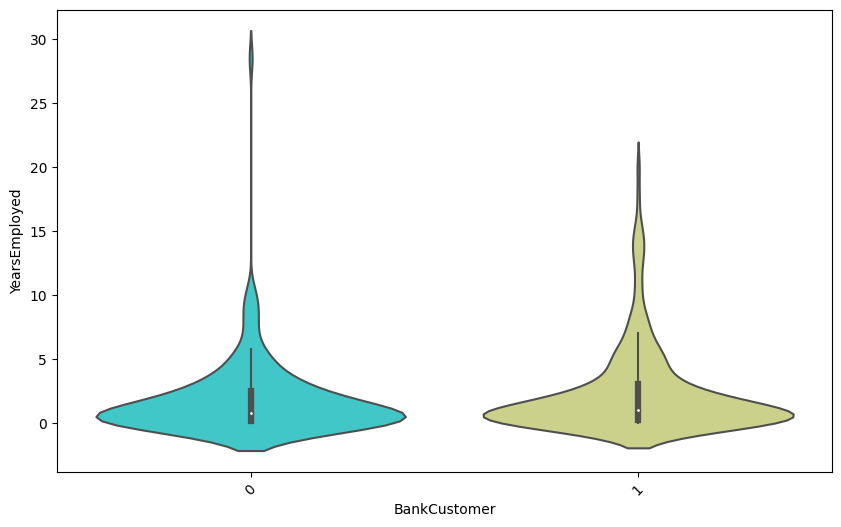

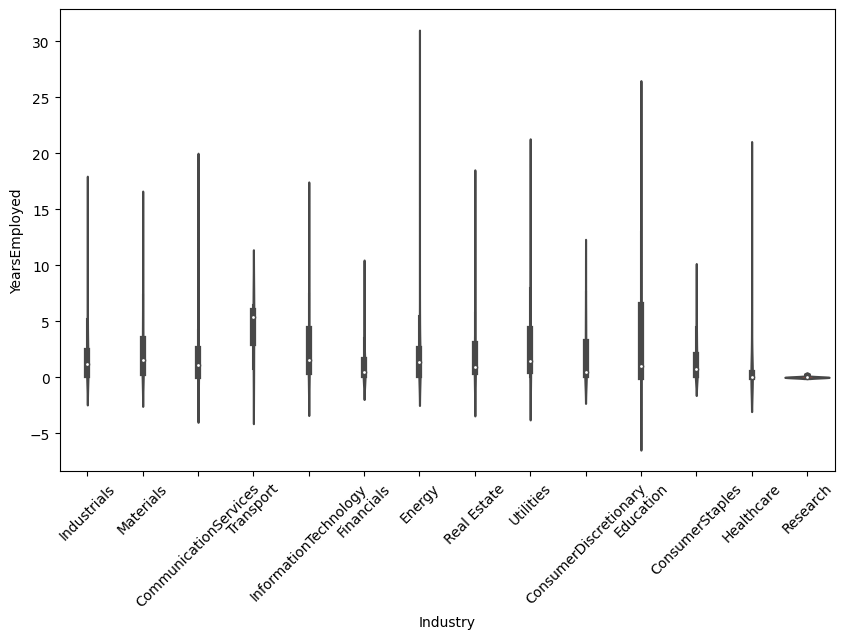

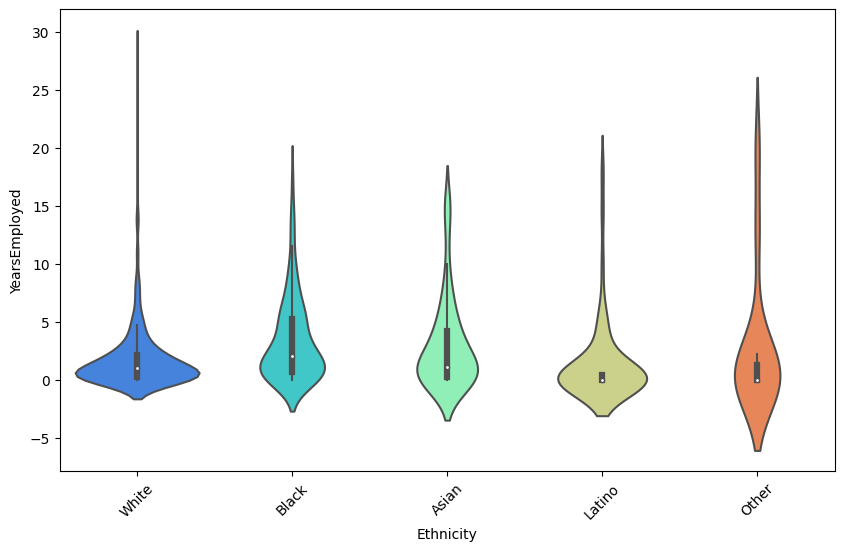

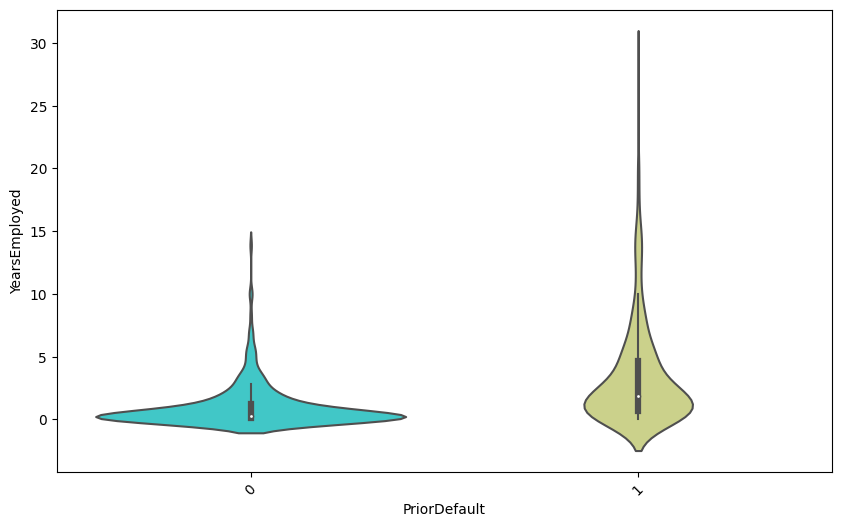

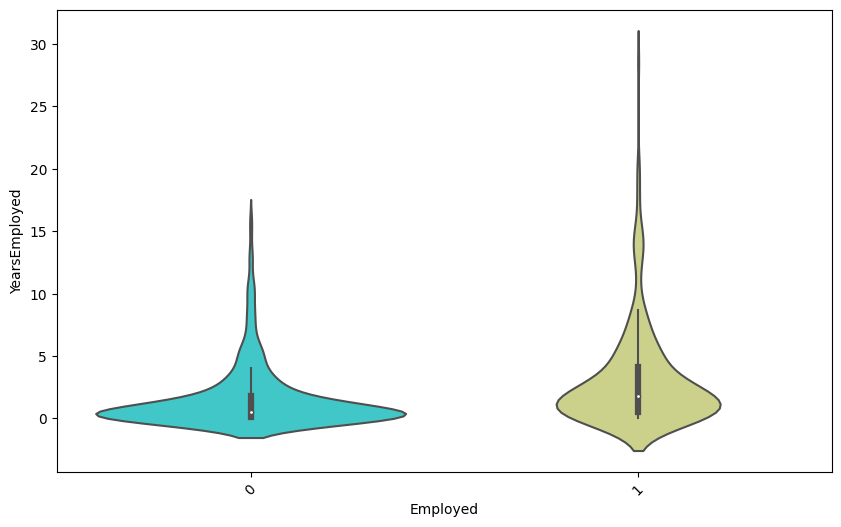

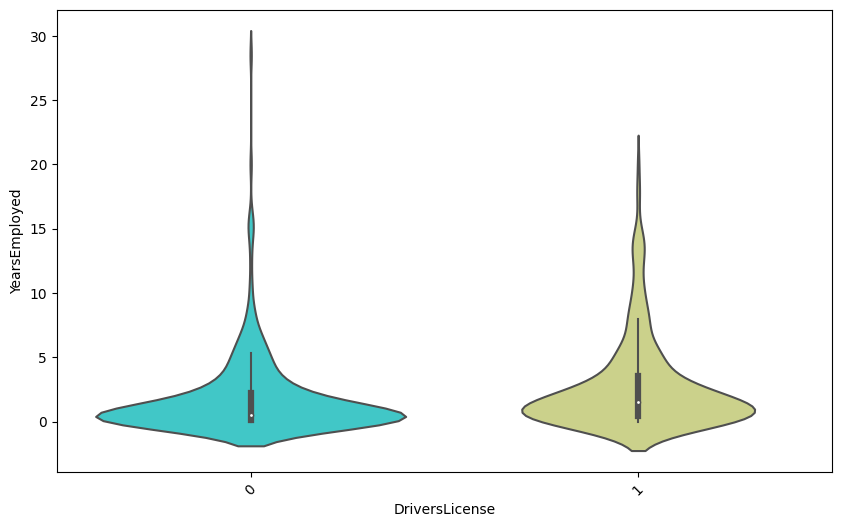

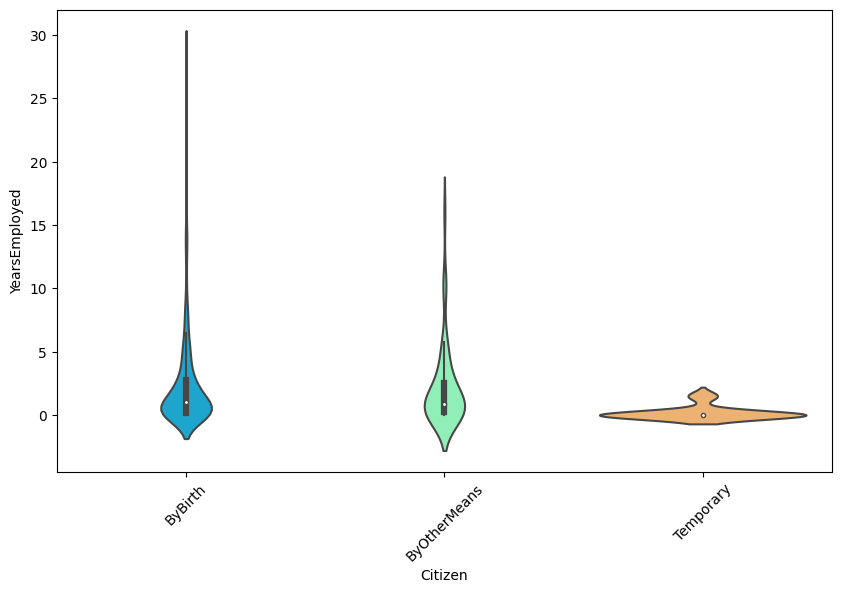

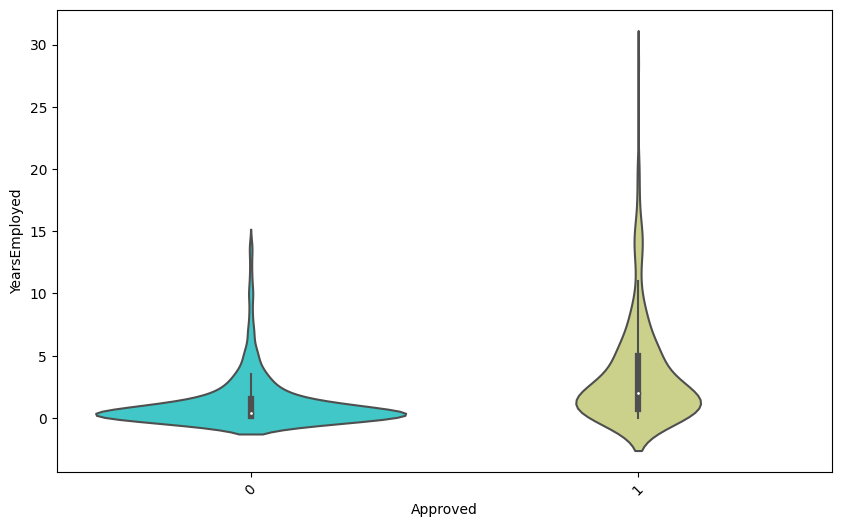

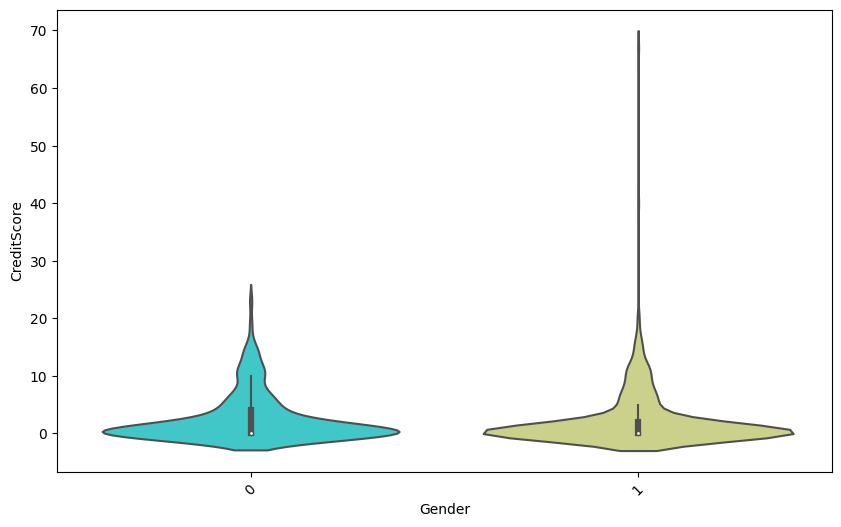

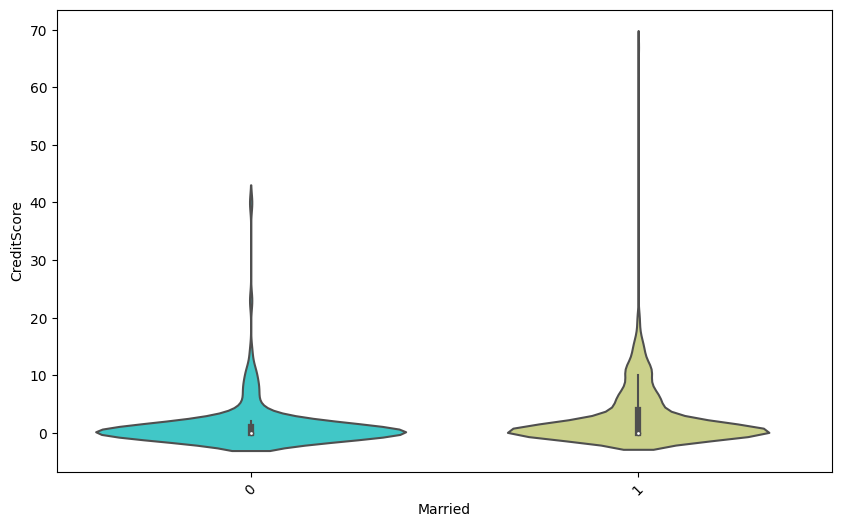

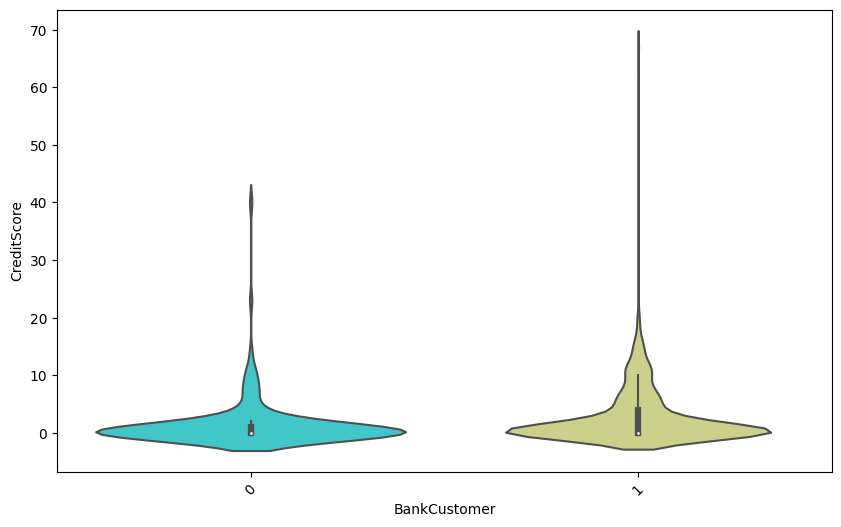

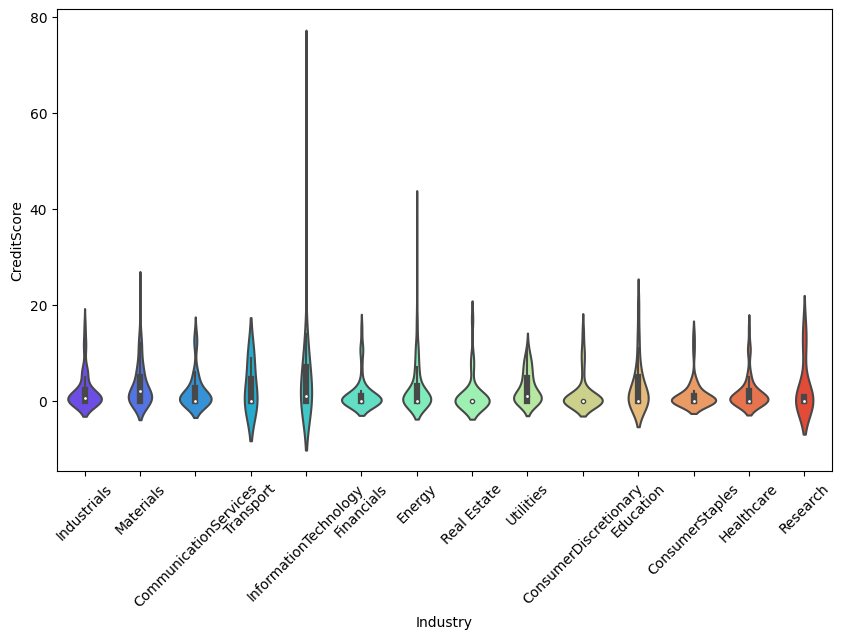

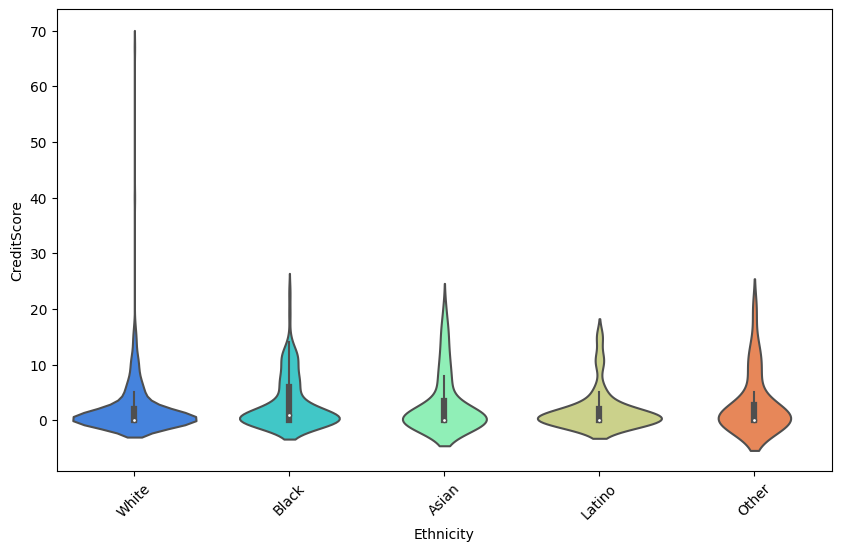

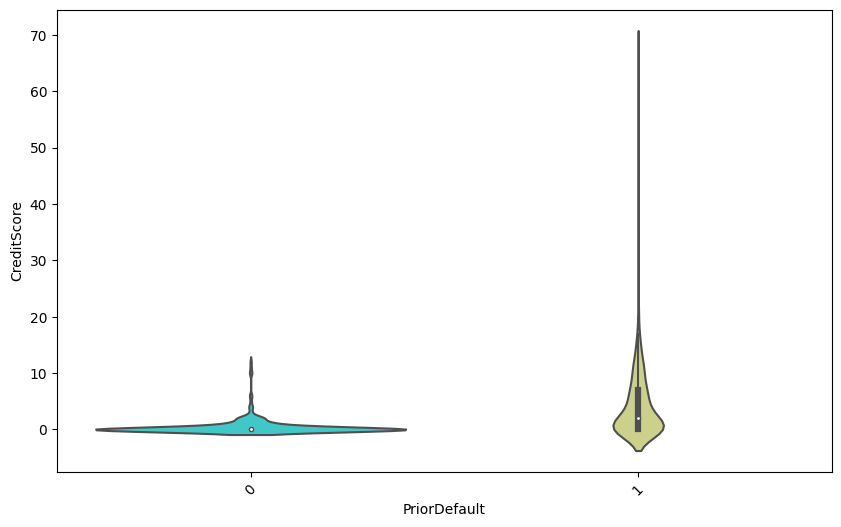

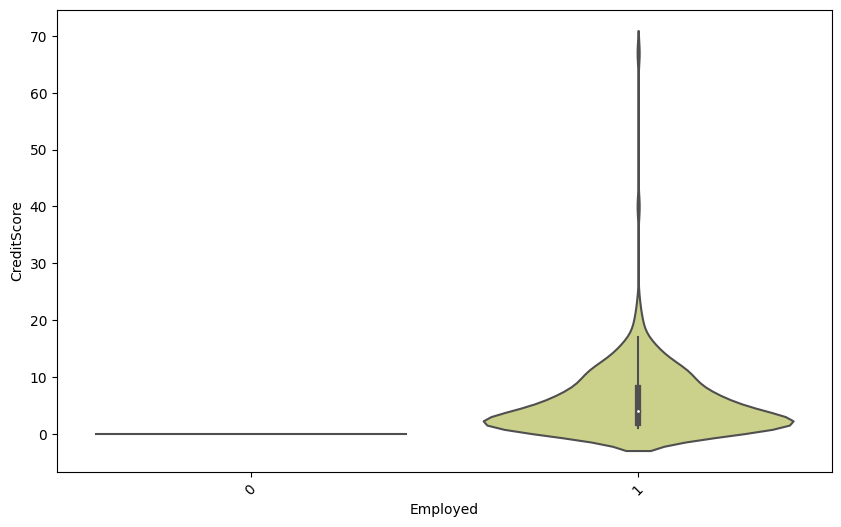

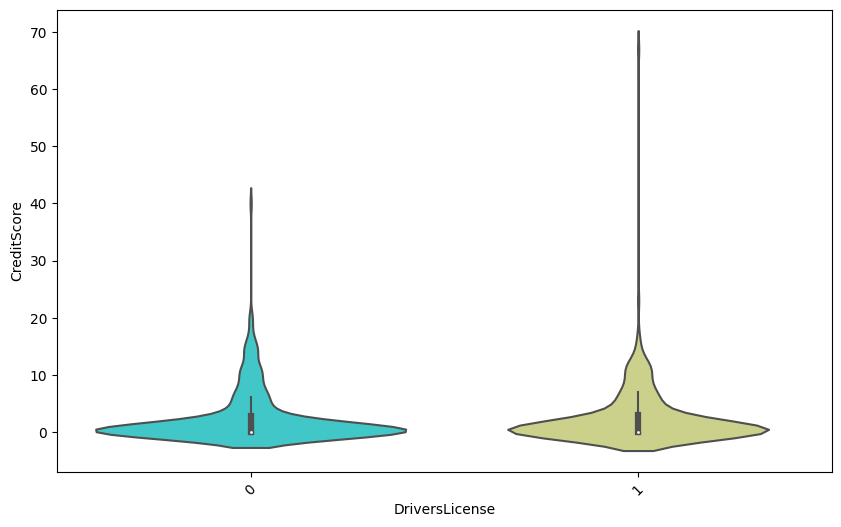

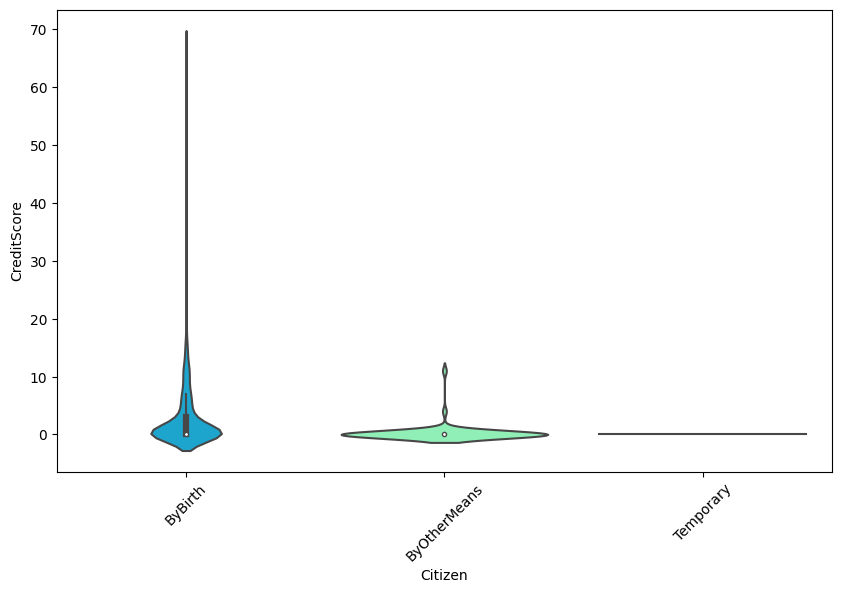

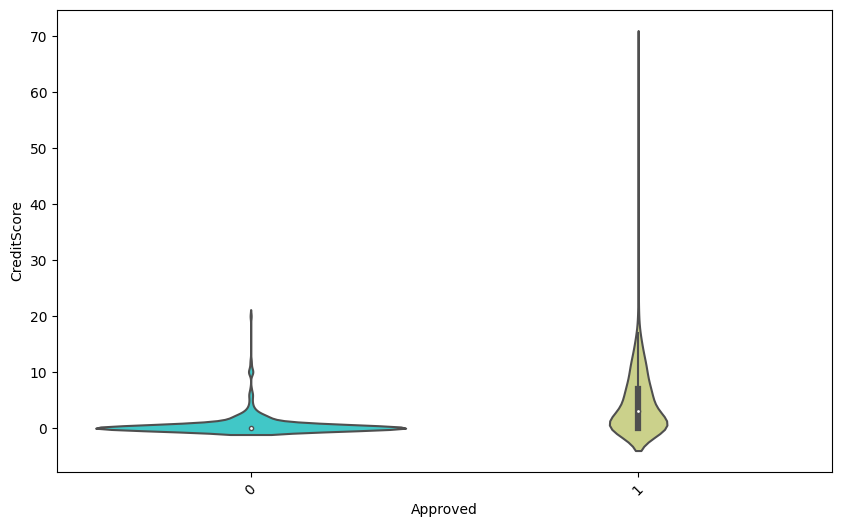

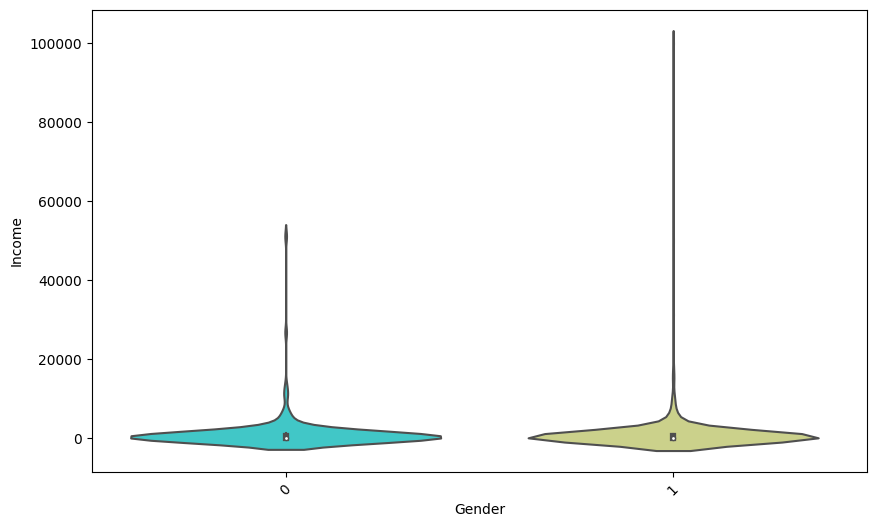

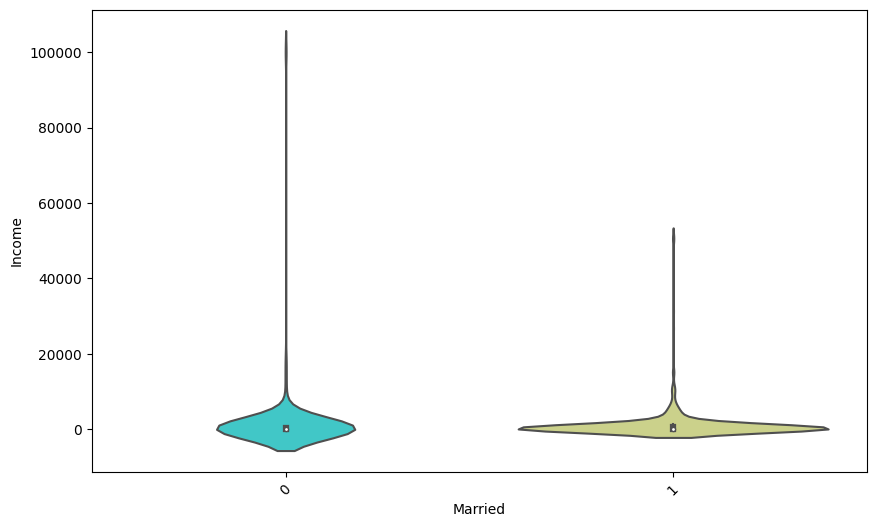

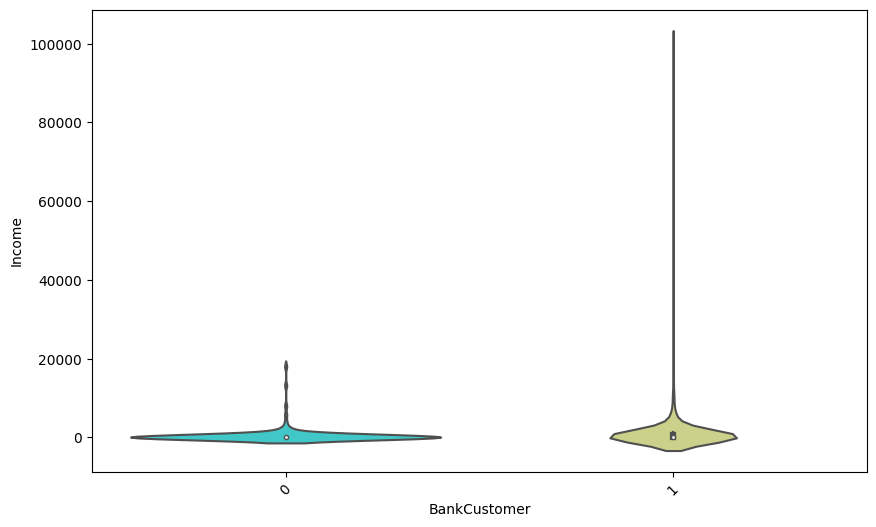

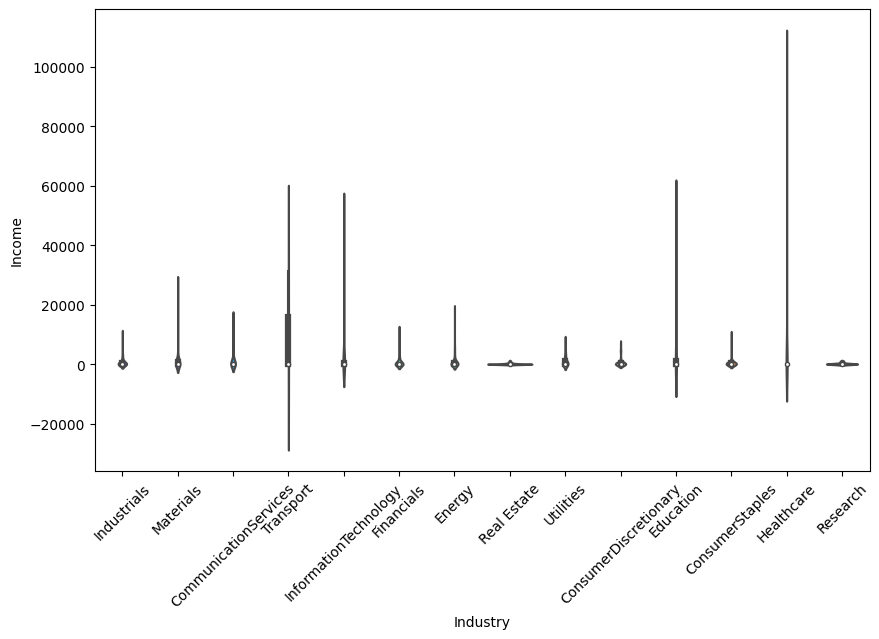

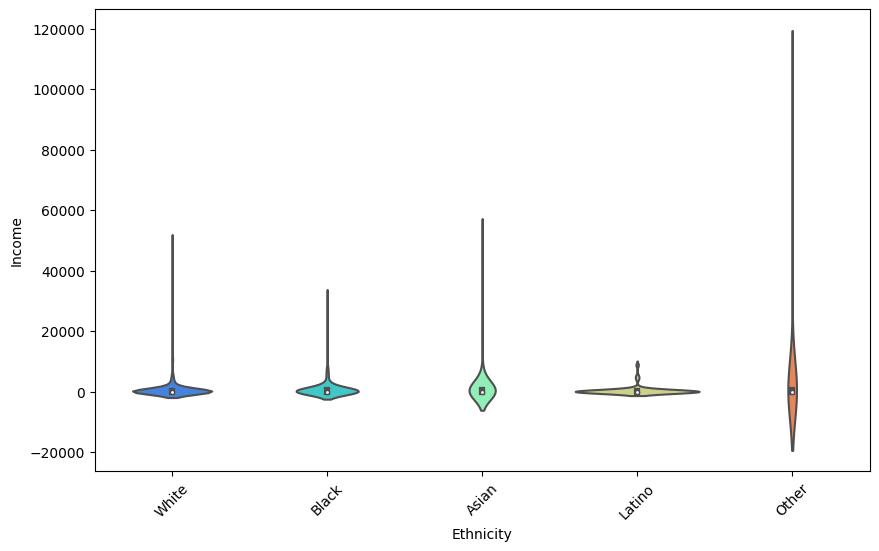

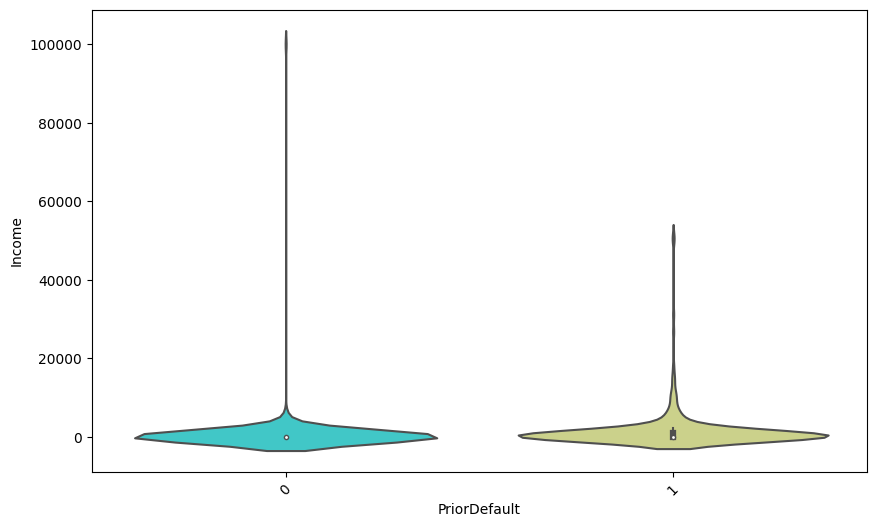

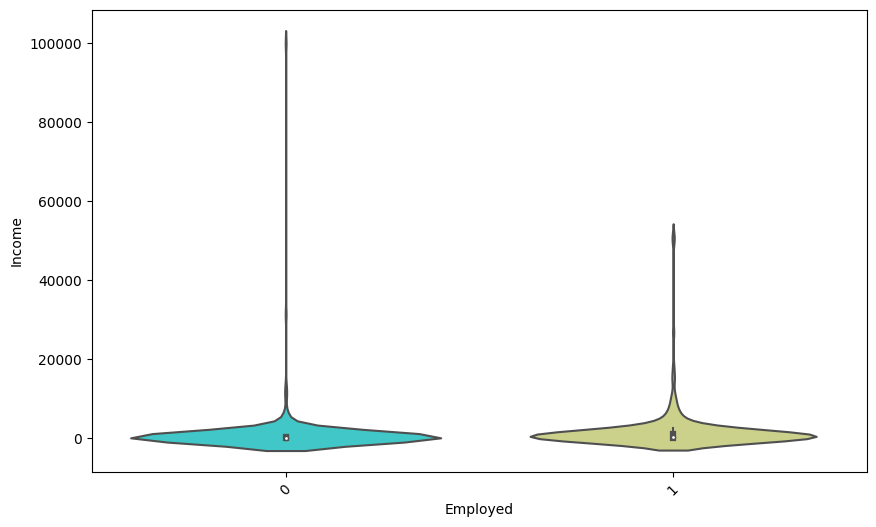

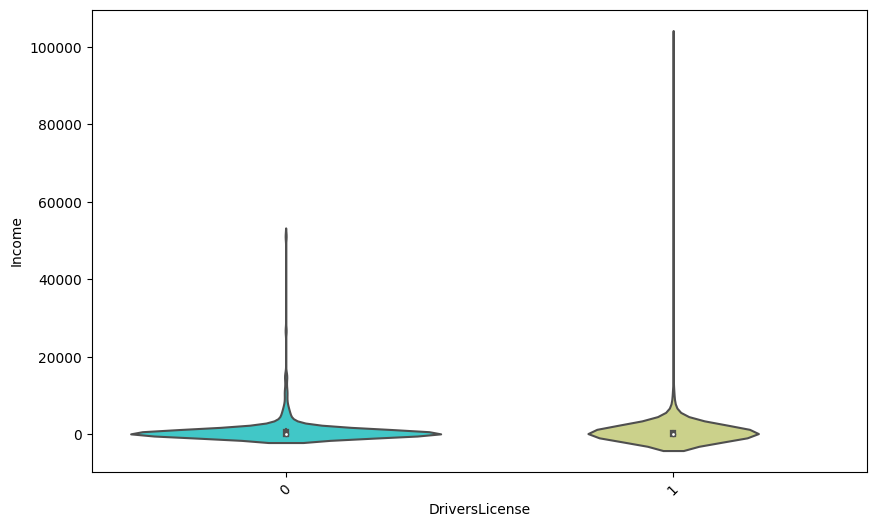

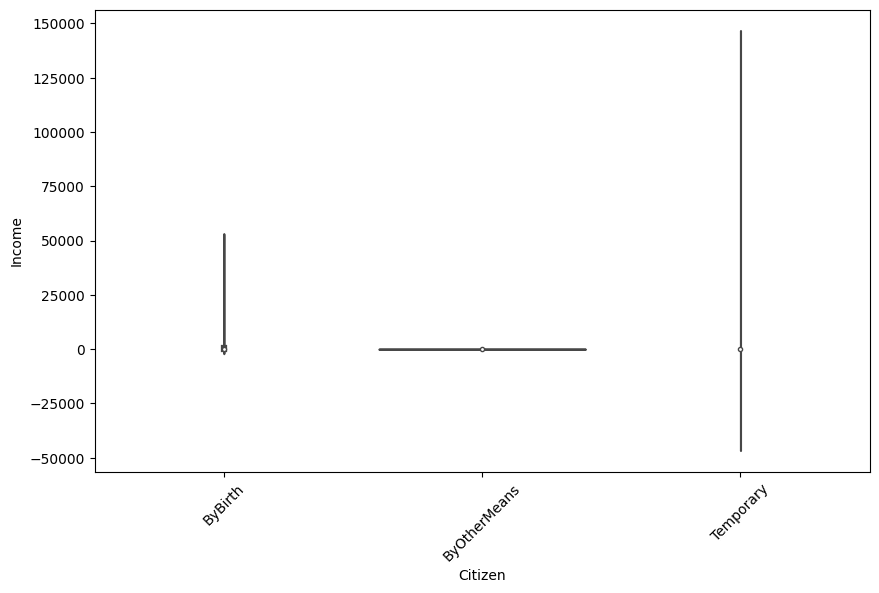

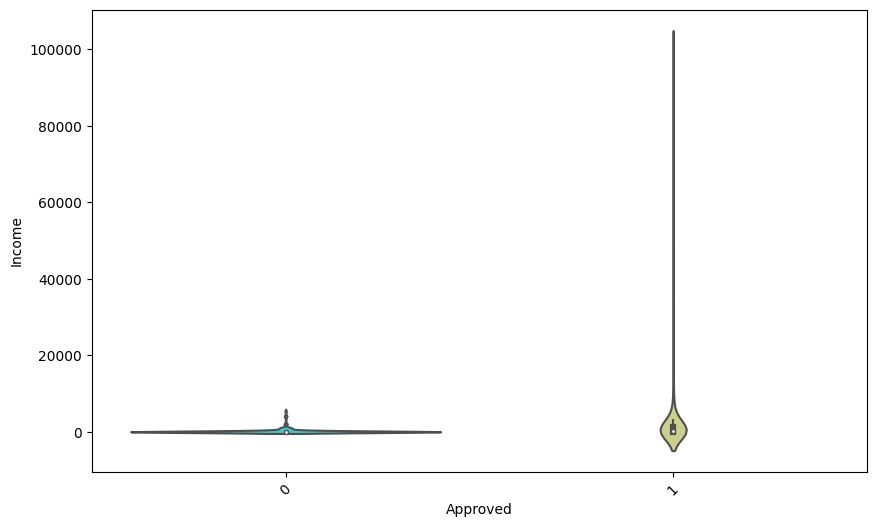

In [48]:
#bivariate anaylsis numerical and categorical
for num in numerical:
    for cat in categorical:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=45)
        sns.violinplot(x=cat, y=num, data=card_approval_df,palette='rainbow')
        plt.show()

In [59]:
#categorical vs categorical chi square analysis
from scipy import stats

for cat1 in categorical:
    for cat2 in categorical:
        crosstab = pd.crosstab(card_approval_df[cat1], card_approval_df[cat2])
        print(cat1,'vs',cat2)
        if stats.chi2_contingency(crosstab)[1] < 0.05:
            print("Dependent")
        else:
            print("Independent")
        print("\n")

Gender vs Gender
Dependent


Gender vs Married
Independent


Gender vs BankCustomer
Independent


Gender vs Industry
Dependent


Gender vs Ethnicity
Dependent


Gender vs PriorDefault
Independent


Gender vs Employed
Independent


Gender vs DriversLicense
Independent


Gender vs Citizen
Independent


Gender vs Approved
Independent


Married vs Gender
Independent


Married vs Married
Dependent


Married vs BankCustomer
Dependent


Married vs Industry
Dependent


Married vs Ethnicity
Independent


Married vs PriorDefault
Dependent


Married vs Employed
Dependent


Married vs DriversLicense
Independent


Married vs Citizen
Independent


Married vs Approved
Dependent


BankCustomer vs Gender
Independent


BankCustomer vs Married
Dependent


BankCustomer vs BankCustomer
Dependent


BankCustomer vs Industry
Independent


BankCustomer vs Ethnicity
Independent


BankCustomer vs PriorDefault
Dependent


BankCustomer vs Employed
Dependent


BankCustomer vs DriversLicense
Independent


BankCustom